# ML Course 4 - Practice (multiple and polynomial regressions)

## Subject

We will use here the same data set as for practice #3.

**`FuelConsumption.csv`** is a vehicle fuel consumption data set that contains model-specific fuel consumption.
-   **MODELYEAR** e.g. 2014
-   **MAKE** e.g. Acura
-   **MODEL** e.g. ILX
-   **VEHICLE CLASS** e.g. SUV
-   **ENGINE SIZE** e.g. 4.7
-   **CYLINDERS** e.g 6
-   **TRANSMISSION** e.g. A6
-   **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
-   **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
-   **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
-   **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn 

In [8]:
data = pd.read_csv("FuelConsumption.csv")

In [9]:
data.sample(6)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
956,2014,SUBARU,LEGACY AWD,MID-SIZE,2.5,4,M6,X,11.3,8.2,9.9,29,228
455,2014,GMC,SIERRA,PICKUP TRUCK - STANDARD,5.3,8,A6,X,14.6,10.3,12.7,22,292
1035,2014,VOLKSWAGEN,JETTA,COMPACT,1.8,4,M5,X,9.4,6.7,8.2,34,189
177,2014,CADILLAC,CTS-V SPORT WAGON,STATION WAGON - SMALL,6.2,8,AS6,Z,19.7,12.9,16.6,17,382
284,2014,CHRYSLER,300 AWD,FULL-SIZE,3.6,6,A8,X,12.8,8.6,10.9,26,251
245,2014,CHEVROLET,SILVERADO 4WD,PICKUP TRUCK - STANDARD,5.3,8,A6,E,19.9,14.2,17.3,16,277


In [10]:
#data = data.drop(['MODELYEAR'], axis=1)
data.sample(6)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
753,2014,MERCEDES-BENZ,E 63 AMG S 4MATIC WAGON,STATION WAGON - MID-SIZE,5.5,8,AS7,Z,15.5,11.0,13.5,21,310
577,2014,JEEP,COMPASS,SUV - SMALL,2.0,4,A6,X,11.1,8.3,9.8,29,225
242,2014,CHEVROLET,SILVERADO 4WD,PICKUP TRUCK - STANDARD,4.3,6,A6,X,14.2,10.6,12.6,22,290
185,2014,CADILLAC,XTS,FULL-SIZE,3.6,6,AS6,X,13.6,8.6,11.4,25,262
385,2014,FORD,F150 FFV 4X4,PICKUP TRUCK - STANDARD,3.7,6,AS6,X,15.0,11.4,13.4,21,308
268,2014,CHEVROLET,TAHOE 4WD,SUV - STANDARD,5.3,8,A6,E,21.5,14.6,18.4,15,294


* Make some plots of 'CYLINDERS', 'ENGINESIZE', 'FUELCONSUMPTION_COMB', with respect to 'CO2EMISSIONS'.

* Train a multiple linear regression with these three predictors. What are the coefficients associated with each predictor?

* What is the accuracy of this model? What do you think, when compared with the accuracy of the linear regression with 'FUELCONSUMPTION_COMB' as single predictor (computed in last question of practice #3)?

* 'FUELCONSUMPTION_CITY' is the urban consumption while FUELCONSUMPTION_HWY is the consumption on the highway. 'FUELCONSUMPTION_COMB' is the combined consumption and is computed as a weighted sum of 'FUELCONSUMPTION_CITY' and 'FUELCONSUMPTION_HWY' so to represent a standard driver behaviour. How are these three features correlated between each other?

* Add 'FUELCONSUMPTION_CITY' and 'FUELCONSUMPTION_HWY' as additional predictors to your model of question #2. What is the gain of accuracy, and how do you interpret that?

* Bonus (no penalty if not done): Plot 'CO2EMISSIONS' with respect to 'FUELCONSUMPTION_COMB' for each possible value of 'FUELTYPE' (i.e. plot the scatter dots with one distinct color for each value of 'FUELTYPE'). Do you think that 'FUELTYPE' and 'FUELCONSUMPTION_COMB' could be sufficient predictors for 'CO2EMISSIONS' estimation with a multiple linear regression model? Compute the accuracy.

Data Inspection

In [11]:
correlation = data.corr()
correlation

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
MODELYEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENGINESIZE,NaN,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,NaN,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,NaN,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,NaN,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,NaN,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,NaN,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,NaN,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


ValueError: The number of FixedLocator locations (8), usually from a call to set_ticks, does not match the number of ticklabels (13).

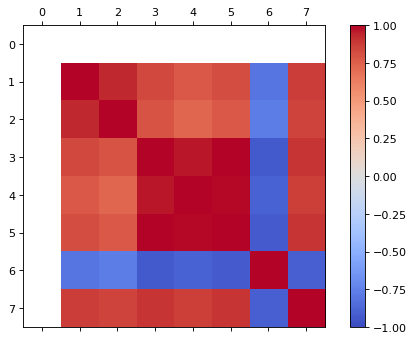

In [12]:
fig = plt.figure(figsize=(8,5), dpi= 80)
ax = fig.add_subplot(1,1,1)
cax = ax.matshow(correlation, cmap = plt.cm.coolwarm, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(correlation))
ax.set_xticks(ticks);
ax.set_yticks(ticks);
names = data.columns
ax.set_xticklabels(names);
ax.set_yticklabels(names);
plt.show();

In [13]:
correlation

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
MODELYEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENGINESIZE,NaN,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,NaN,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,NaN,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,NaN,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,NaN,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,NaN,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,NaN,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


In [14]:
correlation.style.background_gradient(cmap='coolwarm');

In [15]:
mask = np.zeros_like(correlation, dtype=bool)
mask[np.triu_indices_from(mask)] = True
correlation[mask] = np.nan
(correlation
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')  # Color NaNs grey
 .set_precision(2))

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
MODELYEAR,nan,nan,nan,nan,nan,nan,nan,nan
ENGINESIZE,nan,nan,nan,nan,nan,nan,nan,nan
CYLINDERS,nan,0.93,nan,nan,nan,nan,nan,nan
FUELCONSUMPTION_CITY,nan,0.83,0.80,nan,nan,nan,nan,nan
FUELCONSUMPTION_HWY,nan,0.78,0.72,0.97,nan,nan,nan,nan
FUELCONSUMPTION_COMB,nan,0.82,0.78,1.00,0.99,nan,nan,nan
FUELCONSUMPTION_COMB_MPG,nan,-0.81,-0.77,-0.94,-0.89,-0.93,nan,nan
CO2EMISSIONS,nan,0.87,0.85,0.90,0.86,0.89,-0.91,nan


* Make some plots of 'CYLINDERS', 'ENGINESIZE', 'FUELCONSUMPTION_COMB', with respect to 'CO2EMISSIONS'.

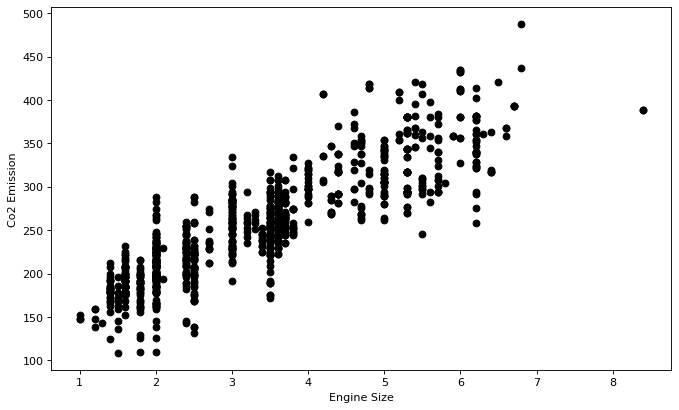

In [16]:
plt.figure(figsize=(10,6), dpi= 80)
plt.scatter(data['ENGINESIZE'], data['CO2EMISSIONS'], c='black')
plt.xlabel("Engine Size")
plt.ylabel("Co2 Emission")
plt.show()

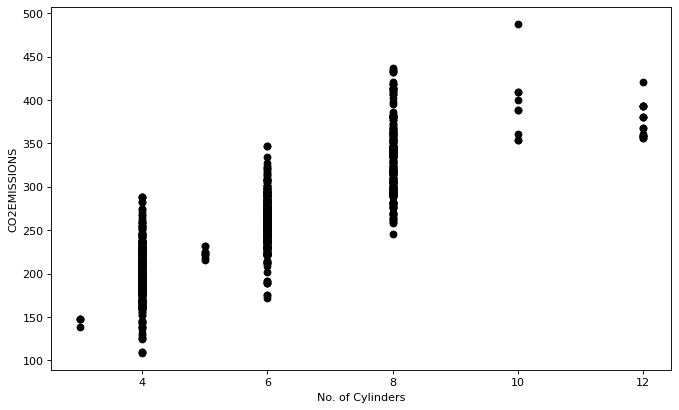

In [17]:
plt.figure(figsize=(10,6), dpi= 80)
plt.scatter(data['CYLINDERS'], data['CO2EMISSIONS'], c='black')
plt.xlabel("No. of Cylinders")
plt.ylabel("CO2EMISSIONS")
plt.show()

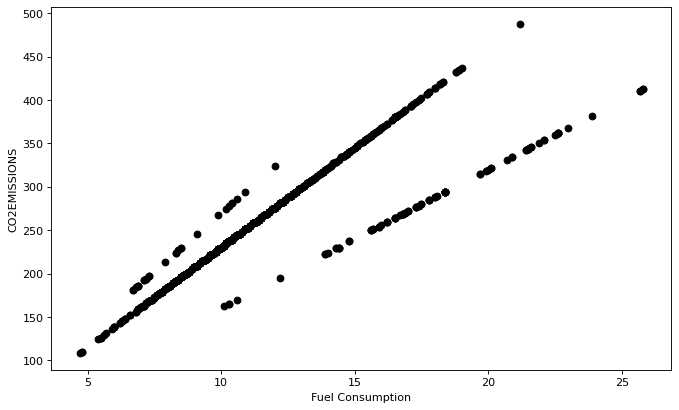

In [18]:
plt.figure(figsize=(10,6), dpi= 80)
plt.scatter(data['FUELCONSUMPTION_COMB'], data['CO2EMISSIONS'], c='black')
plt.xlabel("Fuel Consumption")
plt.ylabel("CO2EMISSIONS")
plt.show()

**Data Preparation**

In [21]:
X

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB
0,2.0,4,8.5
1,2.4,4,9.6
2,1.5,4,5.9
3,3.5,6,11.1
4,3.5,6,10.6
...,...,...,...
1062,3.0,6,11.8
1063,3.2,6,11.5
1064,3.0,6,11.8
1065,3.2,6,11.3


In [22]:
X = data.drop(['CO2EMISSIONS','MAKE','VEHICLECLASS','MODEL', 'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB_MPG', 'MODELYEAR'], axis=1)
y = data['CO2EMISSIONS'].values.reshape(-1,1)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [24]:
from sklearn.linear_model import LinearRegression
reg_single = LinearRegression()
reg_single.fit(X_train['ENGINESIZE'].values.reshape(-1,1), y_train)

LinearRegression()

### Single Linear regression error

In [25]:
y_pred = reg_single.predict(X_test['ENGINESIZE'].values.reshape(-1,1))
print("Residual sum of squares (RSS): %.2f" % sum((y_pred - y_test) ** 2))
print("Mean absolute error (MAE): %.2f" % np.mean(abs(y_pred - y_test)))
print("Mean square error (MSE): %.2f" % np.mean((y_pred - y_test) ** 2))
print("Root mean square error (RMSE): %.2f" % np.sqrt(np.mean((y_pred - y_test) ** 2)))

Residual sum of squares (RSS): 373781.28
Mean absolute error (MAE): 24.86
Mean square error (MSE): 1049.95
Root mean square error (RMSE): 32.40


<font size = "5" color = "darkblue">Train a multiple linear regression with these three predictors. What are the coefficients associated with each predictor?

In [26]:
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [27]:
reg_multiple = LinearRegression()
reg_multiple.fit(X_train, y_train)
print("The linear model is: Y = {:.5} + {:.5}*CYLINDERS + {:.5}*ENGINESIZE + {:.5}*FUELCONSUMPTION_COMB".format(reg_multiple.intercept_[0], reg_multiple.coef_[0][0], reg_multiple.coef_[0][1], reg_multiple.coef_[0][2]))

The linear model is: Y = 64.341 + 10.812*CYLINDERS + 7.9121*ENGINESIZE + 9.6282*FUELCONSUMPTION_COMB


In [28]:
print(reg_multiple.intercept_[0], reg_multiple.coef_[0][0], reg_multiple.coef_[0][1], reg_multiple.coef_[0][2])

64.3411843265086 10.811822848685246 7.912116181915291 9.628194658379993


<font size = "5" color = "darkblue"> What is the accuracy of this model? What do you think, when compared with the accuracy of the linear regression with 'FUELCONSUMPTION_COMB' as single predictor (computed in last question of practice #3)?

In [29]:
y_pred = reg_multiple.predict(X_test)
print("Residual sum of squares (RSS): %.2f" % sum((y_pred - y_test) ** 2))
print("Mean absolute error (MAE): %.2f" % np.mean(abs(y_pred - y_test)))
print("Mean square error (MSE): %.2f" % np.mean((y_pred - y_test) ** 2))
print("Root mean square error (RMSE): %.2f" % np.sqrt(np.mean((y_pred - y_test) ** 2)))

Residual sum of squares (RSS): 219936.91
Mean absolute error (MAE): 18.05
Mean square error (MSE): 617.80
Root mean square error (RMSE): 24.86


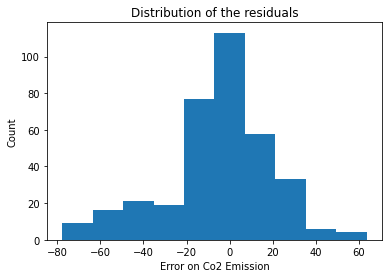

In [30]:
residuals = y_test - y_pred
plt.hist(x= residuals)
plt.xlabel('Error on Co2 Emission')
plt.ylabel('Count')
plt.title("Distribution of the residuals")
plt.show()

The error in the multiple regression model is relatively lower than that from the single linear model because we know that the correlation between Co2 emission and cylinder are less dispressed and also the correlation between CO2 and Combined Combustion is strictly linear.  The error is almost decreased by 2 % from 224 to 219 approx.   


Only the data between Engine size and the Co2 emission are more dispressed and hence leads to error. But in multiple regression the cylinder data and combustion combined data are also taken into consideration, which results in lowering down the error.

## Polynomial regression


In [31]:
X_test

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB
766,5.5,8,15.5
204,2.4,4,9.1
629,2.4,4,10.0
897,2.7,6,9.2
711,2.5,4,7.3
...,...,...,...
467,3.6,6,12.6
427,3.5,6,15.7
506,5.0,8,13.2
258,1.4,4,7.9


In [32]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=5, include_bias=False)
X_train_poly = poly.fit_transform(X_train['ENGINESIZE'].values.reshape(-1,1))

X_train_poly = pd.DataFrame(X_train_poly)
X_train_poly.columns = poly.get_feature_names()

In [33]:
X_train_poly[:5]

,x0,x0^2,x0^3,x0^4,x0^5
0,3.0,9.00,27.000,81.0000,243.00000
1,5.7,32.49,185.193,1055.6001,6016.92057
2,3.8,14.44,54.872,208.5136,792.35168
3,3.5,12.25,42.875,150.0625,525.21875
4,2.0,4.00,8.000,16.0000,32.00000


In [34]:
reg_poly = LinearRegression()
reg_poly.fit(X_train_poly, y_train)

LinearRegression()

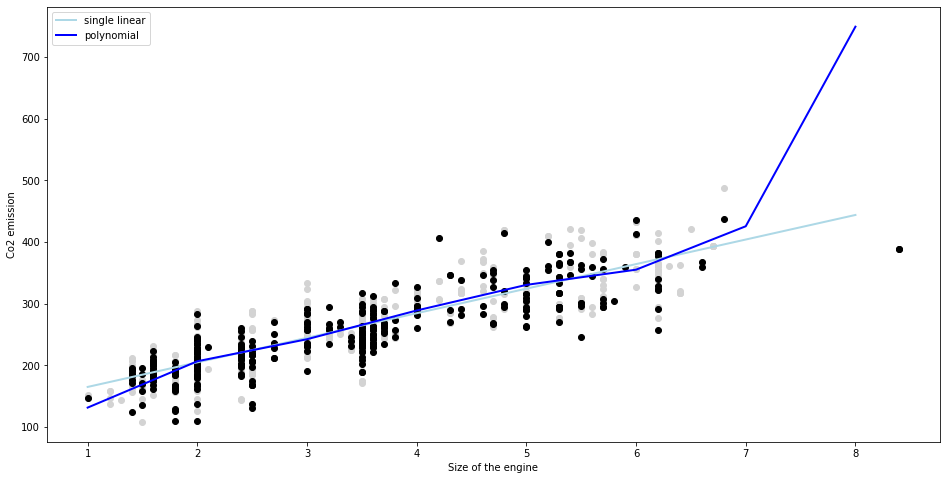

In [35]:
X_plot = np.arange(min(data['ENGINESIZE']),max(data['ENGINESIZE']),1)
X_plot = X_plot.reshape(-1, 1)
X_poly_plot = poly.transform(X_plot)
y_poly_plot = reg_poly.predict(X_poly_plot)
y_single_plot = reg_single.predict(X_plot)

plt.figure(figsize=(16, 8))
plt.scatter(X_train['ENGINESIZE'], y_train, c='lightgray')
plt.scatter(X_test['ENGINESIZE'], y_test, c='black')
plt.plot(X_plot, y_single_plot, c='lightblue', linewidth=2, label='single linear')
plt.plot(X_plot, y_poly_plot, c='blue', linewidth=2, label='polynomial')
plt.xlabel("Size of the engine")
plt.ylabel("Co2 emission")
plt.legend()
plt.show()

### Accuracy

In [36]:
y_pred = reg_poly.predict(poly.transform(X_test['ENGINESIZE'].values.reshape(-1, 1)))
print("Residual sum of squares (RSS): %.2f" % sum((y_pred - y_test) ** 2))
print("Mean absolute error (MAE): %.2f" % np.mean(abs(y_pred - y_test)))
print("Mean square error (MSE): %.2f" % np.mean((y_pred - y_test) ** 2))
print("Root mean square error (RMSE): %.2f" % np.sqrt(np.mean((y_pred - y_test) ** 2)))

Residual sum of squares (RSS): 1194646.03
Mean absolute error (MAE): 28.14
Mean square error (MSE): 3355.75
Root mean square error (RMSE): 57.93


### With interaction terms

In [37]:
from sklearn.preprocessing import PolynomialFeatures
interaction = PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)
X_train_interaction = interaction.fit_transform(X_train)

X_train_interaction = pd.DataFrame(X_train_interaction)
X_train_interaction.columns = interaction.get_feature_names()

In [38]:
X_train_interaction.head()

,x0,x1,x2,x0^2,x0 x1,x0 x2,x1^2,x1 x2,x2^2
0,3.0,6.0,17.3,9.00,18.0,51.90,36.0,103.8,299.29
1,5.7,8.0,12.8,32.49,45.6,72.96,64.0,102.4,163.84
2,3.8,6.0,11.9,14.44,22.8,45.22,36.0,71.4,141.61
3,3.5,6.0,11.3,12.25,21.0,39.55,36.0,67.8,127.69
4,2.0,4.0,9.8,4.00,8.0,19.60,16.0,39.2,96.04


In [39]:
reg_interaction = LinearRegression()
reg_interaction.fit(X_train_interaction, y_train)

LinearRegression()

In [40]:
# y_pred = clf.predict(X_test)
y_pred = reg_interaction.predict(interaction.transform(X_test))
print("Residual sum of squares (RSS): %.2f" % sum((y_pred - y_test) ** 2))
print("Mean absolute error (MAE): %.2f" % np.mean(abs(y_pred - y_test)))
print("Mean square error (MSE): %.2f" % np.mean((y_pred - y_test) ** 2))
print("Root mean square error (RMSE): %.2f" % np.sqrt(np.mean((y_pred - y_test) ** 2)))

Residual sum of squares (RSS): 159265.48
Mean absolute error (MAE): 11.49
Mean square error (MSE): 447.37
Root mean square error (RMSE): 21.15


<font size = "4" color = "Darkblue"> Plot 'CO2EMISSIONS' with respect to 'FUELCONSUMPTION_COMB' for each possible value of 'FUELTYPE' (i.e. plot the scatter dots with one distinct color for each value of 'FUELTYPE'). Do you think that 'FUELTYPE' and 'FUELCONSUMPTION_COMB' could be sufficient predictors for 'CO2EMISSIONS' estimation with a multiple linear regression model? Compute the accuracy.

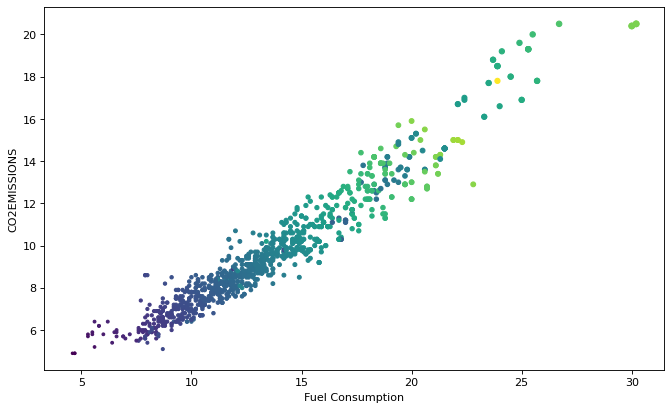

In [41]:
plt.figure(figsize=(10,6), dpi= 80)
plt.scatter(data['FUELCONSUMPTION_CITY'],data['FUELCONSUMPTION_HWY'],data['FUELCONSUMPTION_COMB'], data['CO2EMISSIONS'])
plt.xlabel("Fuel Consumption")
plt.ylabel("CO2EMISSIONS")
plt.show()

The **"FUELCONSUMPTION_CITY"** and **"FUELCONSUMPTION_HWY"** is not weighted sum for the **"FUELCONSUMPTION_COMB"**. 

As we can see, Correlation between FUELCONSUMPTION_CITY and Co2 Emission is **0.99** where the correlation between FUELCONSUMPTION_HWY and CO2 is **0.98** 


In [42]:
x = data['FUELCONSUMPTION_CITY'].corr(data['FUELCONSUMPTION_COMB'])
x

0.9955423996306135

In [43]:
x1 = data['FUELCONSUMPTION_HWY'].corr(data['FUELCONSUMPTION_COMB'])
x1

0.9858038475936333

<font size = "5" color = "darkblue"> Add 'FUELCONSUMPTION_CITY' and 'FUELCONSUMPTION_HWY' as additional predictors to your model of question #2. What is the gain of accuracy, and how do you interpret that?

In [71]:
X = data.filter(['CYLINDERS', 'ENGINESIZE', 'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY'])
y = data.filter(['CO2EMISSIONS']).values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)



In [78]:
X

,CYLINDERS,ENGINESIZE,FUELCONSUMPTION_COMB,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY
0,4,2.0,8.5,9.9,6.7
1,4,2.4,9.6,11.2,7.7
2,4,1.5,5.9,6.0,5.8
3,6,3.5,11.1,12.7,9.1
4,6,3.5,10.6,12.1,8.7
...,...,...,...,...,...
1062,6,3.0,11.8,13.4,9.8
1063,6,3.2,11.5,13.2,9.5
1064,6,3.0,11.8,13.4,9.8
1065,6,3.2,11.3,12.9,9.3


array([[196],
       [221],
       [136],
       ...,
       [271],
       [260],
       [294]], dtype=int64)

In [82]:
reg = LinearRegression()
reg.fit(X_train, y_train)

print(reg_multiple.coef_)



[[  7.65914224  10.8547316   31.14100197 -11.21595269 -10.47231908]]


In [83]:
print("The linear model is: Y1 = {:.5} + {:.5}*CYLINDERS + {:.5}*ENGINESIZE + {:.5}*FUELCONSUMPTION_COMB + {:.5}*FUELCONSUMPTION_CITY + {:.5}*FUELCONSUMPTION_HWY".format(reg_multiple.intercept_[0], reg_multiple.coef_[0][0], reg_multiple.coef_[0][1], reg_multiple.coef_[0][2], reg_multiple.coef_[0][3], reg_multiple.coef_[0][4]) )

The linear model is: Y1 = 64.881 + 7.6591*CYLINDERS + 10.855*ENGINESIZE + 31.141*FUELCONSUMPTION_COMB + -11.216*FUELCONSUMPTION_CITY + -10.472*FUELCONSUMPTION_HWY


In [88]:
y_pred = reg.predict(X_test)
print("Residual sum of squares (RSS): %.2f" % sum((y_pred - y_test) ** 2))
print("Mean absolute error (MAE): %.2f" % np.mean(abs(y_pred - y_test)))
print("Mean square error (MSE): %.2f" % np.mean((y_pred - y_test) ** 2))
print("Root mean square error (RMSE): %.2f" % np.sqrt(np.mean((y_pred - y_test) ** 2)))

Residual sum of squares (RSS): 219764.39
Mean absolute error (MAE): 18.02
Mean square error (MSE): 617.32
Root mean square error (RMSE): 24.85


**Analysis**

- When we considered the 5 parameters interms of 3, the error is reduced from **219936** to  **219764**. And we able to slightly improve our model. 